# Convolutional Neural Networks (CNN)

CNN's (a.k.a. Convnets) are very sophisitcated models for working with high-dimensional, but strongly locally correlated data.

Typical data includes images and audio.

Below we run the simplest CNN we can on the MNIST dataset. It performs practically perfectly, with only a few errors that are clearly issue with the persons handwriting!

It's got to the point where MNIST is too easy, and most people focus on real life photos. But we'll use MNIST because it's simple.

In [1]:
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
batch_size = 128
num_classes = 10
epochs = 1 # Use a very small number of epochs. It takes a really long time.

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Let's implement a CNN.

You will need to make use of the Keras objects `Conv2D`, `MaxPooling2D`, `Flatten` and `Dense`. Look them up in the documentation.

Generally CNNs are often much deeper than we have here. Some use many (i.e. tens of) convolutional layers.

Also, training of a CNN this time takes a long time (comparing to traditional sklearn algorithms). We're intentionally reducing the size of the CNN so we don't waste too much time.

In reality, all the difficult tasks are tackled by GPUs, which are much faster at training that CPUs.

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [4]:
# NBVAL_SKIP
print("Go and get a coffee...")
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Go and get a coffee...
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 34s 568us/step - loss: 0.7530 - acc: 0.7614 - val_loss: 0.2361 - val_acc: 0.9484
Test loss: 0.23605925535
Test accuracy: 0.9484


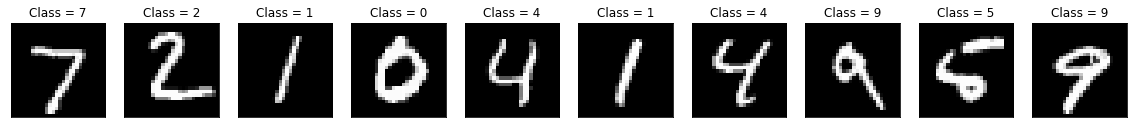

In [5]:
# NBVAL_SKIP
# Plot the results
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    pred_class = model.predict_classes(x_test[i:i+1], verbose=0)
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Class = %d" % (pred_class))
plt.show()

## Tasks

- Try adding more conv/pooling layers
- Try altering the number of neurons
- Try altering the size
- Plot the roc curve
- Etc